<a href="https://colab.research.google.com/github/InutilemMachina/DataSciRepo/blob/main/Bayesian_optimization_for_hyperparameter_tuning_of_an_SVM_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bayesian optimization for hyperparameter tuning of an SVM classifier

for Bayesian optimization:
https://www.dailydoseofds.com/bayesian-optimization-for-hyperparameter-tuning/

In [1]:
!pip install scikit-optimize  # for skopt

In [7]:
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from skopt import gp_minimize
from skopt.space import Real, Integer, Categorical
from skopt.utils import use_named_args
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

import matplotlib.pyplot as plt
import numpy as np

iris = load_iris()
X = iris.data[:, :2]  # Use only the first two features for visualization.
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = SVC()
clf.fit(X_train, y_train)
print("Default hyperparameters:")
print(clf.get_params())
print("Accuracy with default hyperparameters: %.4f" % clf.score(X, y))

Default hyperparameters:
{'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
Accuracy with default hyperparameters: 0.8333


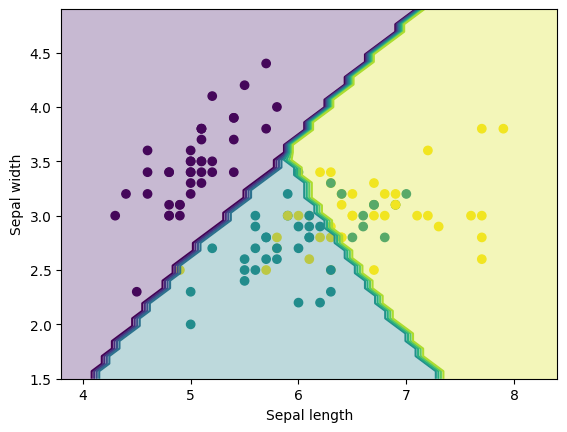

In [4]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

xx, yy = np.meshgrid(np.linspace(X[:, 0].min() - .5, X[:, 0].max() + .5, 50),
                     np.linspace(X[:, 1].min() - .5, X[:, 1].max() + .5, 50))

grid_points = np.c_[xx.ravel(), yy.ravel()]
Z = clf.predict(grid_points)
Z = Z.reshape(xx.shape)

plt.contour(xx, yy, Z)  # colors='k', levels=[-1., 0., 1.]
plt.contourf(xx, yy, Z, alpha=.3)  # , colors=['red', 'blue', 'green']

plt.show()

In [5]:
# ... (import statements and data loading)

space = [Real(1e-3, 1.0, "log-uniform", name="C"),
         Real(1e-3, 1.0, "log-uniform", name="gamma"),
         Integer(1, 5, name="degree"),
         Categorical(['linear', 'poly', 'rbf', 'sigmoid'], name="kernel")]

@use_named_args(space)
def objective(**params):
    clf = SVC(probability=True, **params)
    return -np.mean(cross_val_score(clf, X, y, cv=5, n_jobs=1, verbose=2))

res_gp = gp_minimize(objective, space, n_calls=50, random_state=0)

print("Best score=%.4f" % res_gp.fun)
print("""Best parameters:
- C=%.8f
- gamma=%.8f
- degree=%d
- kernel=%s""" % (res_gp.x[0], res_gp.x[1], res_gp.x[2], res_gp.x[3]))


[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END ...................

/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END ...................

/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END ...................

/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END ...................

/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END ...................

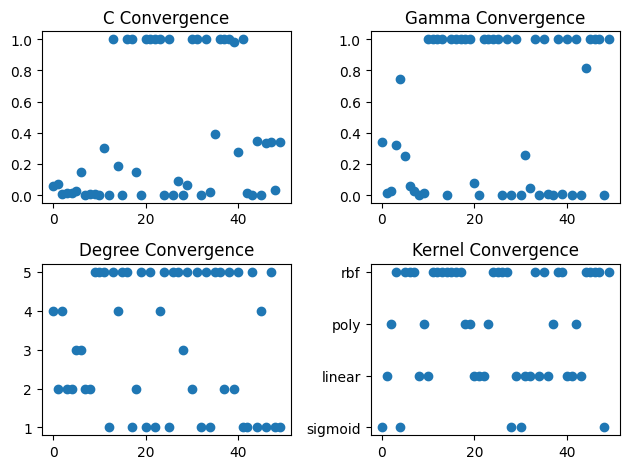

In [13]:
# Get the hyperparameters from the optimization result
C_values = [x[0] for x in res_gp.x_iters]
gamma_values = [x[1] for x in res_gp.x_iters]
degree_values = [x[2] for x in res_gp.x_iters]
kernel_values = [x[3] for x in res_gp.x_iters]

# Create subplots for each hyperparameter
fig, axes = plt.subplots(2, 2)
axes = axes.flatten()

# Create scatter plots for each hyperparameter
axes[0].scatter(range(len(C_values)), C_values)
axes[0].set_title('C Convergence')
axes[1].scatter(range(len(gamma_values)), gamma_values)
axes[1].set_title('Gamma Convergence')
axes[2].scatter(range(len(degree_values)), degree_values)
axes[2].set_title('Degree Convergence')
axes[3].scatter(range(len(kernel_values)), kernel_values)
axes[3].set_title('Kernel Convergence')

plt.tight_layout()
plt.show()


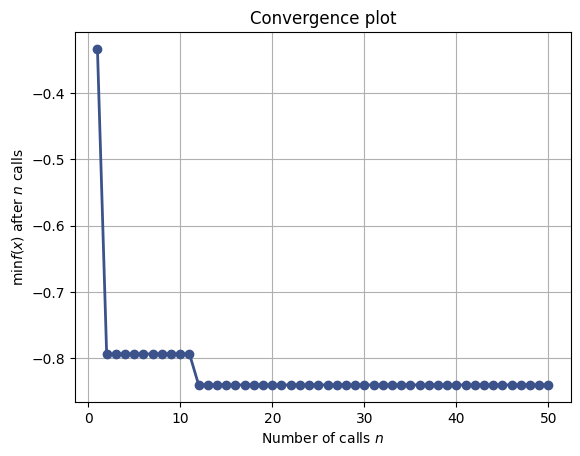

In [20]:
# Plot the convergence plot
from skopt.plots import plot_convergence
plot_convergence(res_gp)
plt.show()

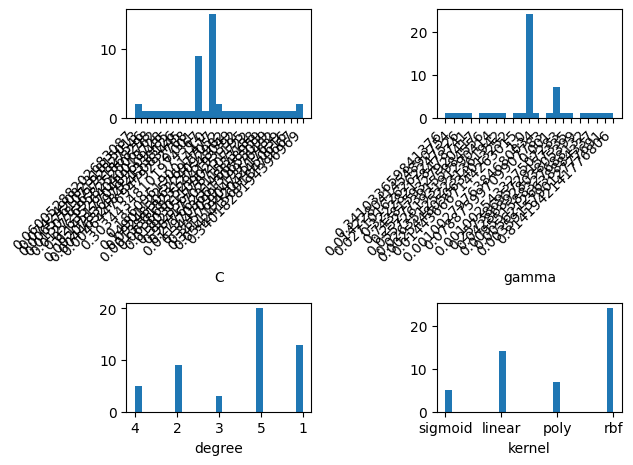

In [33]:
# Convert x_iters list to a NumPy array
x_iters_array = np.array(res_gp.x_iters)

# Visualize the posterior distributions of the parameters.
fig = plt.figure()
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

_ = ax1.hist(x_iters_array[:, 0], bins=25)
_ = ax2.hist(x_iters_array[:, 1], bins=25)
_ = ax3.hist(x_iters_array[:, 2], bins=25)
_ = ax4.hist(x_iters_array[:, 3], bins=25)

ax1.set_xlabel('C')
ax2.set_xlabel('gamma')
ax3.set_xlabel('degree')
ax4.set_xlabel('kernel')

# Rotate x tick labels for the first subplot
ax1.set_xticks(ax1.get_xticks())
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha="right")
# Rotate x tick labels for the first subplot
ax2.set_xticks(ax2.get_xticks())
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha="right")

plt.tight_layout()
plt.show()

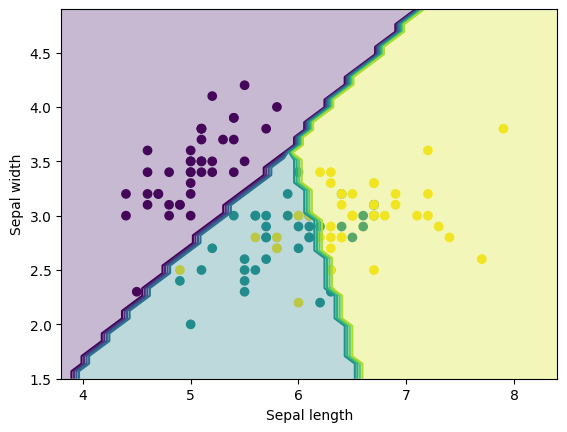

In [24]:
# Visualize the classification results.
clf_best = SVC(C=res_gp.x[0], gamma=res_gp.x[1], degree=res_gp.x[2], kernel='poly')
clf_best.fit(X, y)

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

xx, yy = np.meshgrid(np.linspace(X[:, 0].min() - .5, X[:, 0].max() + .5, 50),
                     np.linspace(X[:, 1].min() - .5, X[:, 1].max() + .5, 50))

grid_points = np.c_[xx.ravel(), yy.ravel()]
Z = clf.predict(grid_points)
Z = Z.reshape(xx.shape)

plt.contour(xx, yy, Z)  # colors='k', levels=[-1., 0., 1.]
plt.contourf(xx, yy, Z, alpha=.3)  # , colors=['red', 'blue', 'green']

plt.show()